# Project 2 : Term Deposit Marketing

Import the Required Libraries and read the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.utils import resample
from sklearn.metrics import classification_report, accuracy_score

In [75]:
data = pd.read_csv("term-deposit-marketing-2020.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


## Exploratory Data Analysis

- Check the dataset for null values
- View the summary of the attributes in the dataset

In [4]:
# Check for missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

No null values in the dataset

In [5]:
# Summary statistics for numerical attributes
numerical_summary = data.describe()
numerical_summary

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [6]:
# Summary for categorical attributes
data.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,y
count,40000,40000,40000,40000,40000,40000,40000,40000,40000
unique,12,3,4,2,2,2,3,11,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,no
freq,9383,24386,20993,39191,24031,33070,24914,13532,37104


### Visualizations

#### Distribution Plots for Numerical Features

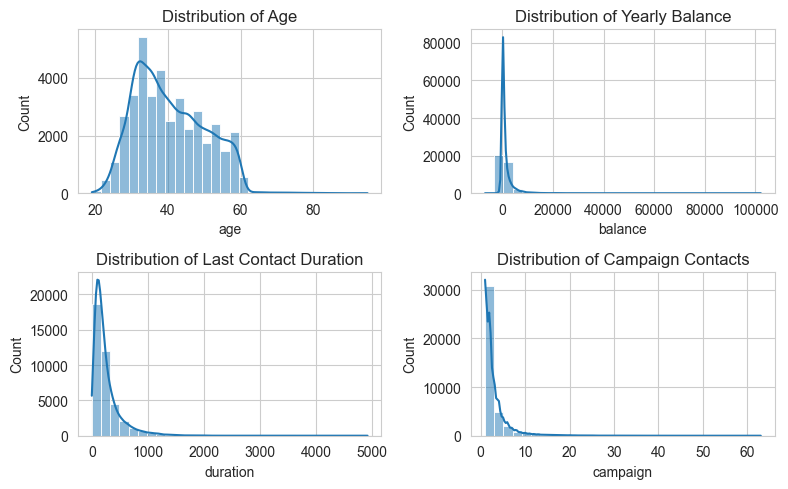

In [7]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions of numerical attributes
fig, ax = plt.subplots(2, 2, figsize=(8, 5))

sns.histplot(data['age'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Age')

sns.histplot(data[data['balance']>-8000]['balance'], bins=30, kde=True, ax=ax[0, 1])  # Excluding extreme outlier for visualization
ax[0, 1].set_title('Distribution of Yearly Balance')

sns.histplot(data['duration'], bins=30, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Last Contact Duration')

sns.histplot(data['campaign'], bins=30, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Campaign Contacts')

plt.tight_layout()
plt.show()


The visualizations provide following insights about the numerical attributes in the dataset:

- Age: Shows a wide range of ages, with a peak around 30s to 40s, indicating a large proportion of customers in this age group.
- Yearly Balance: This attribute has a right-skewed distribution, indicating that most customers have lower balances
- Last Contact Duration: The distribution of the last contact duration is also right-skewed, with most calls being relatively short, but some calls last longer.
- Campaign Contacts: The number of contacts during the campaign for most customers is low, but there are outliers with a very high number of contacts.

#### Distributions of categorical features

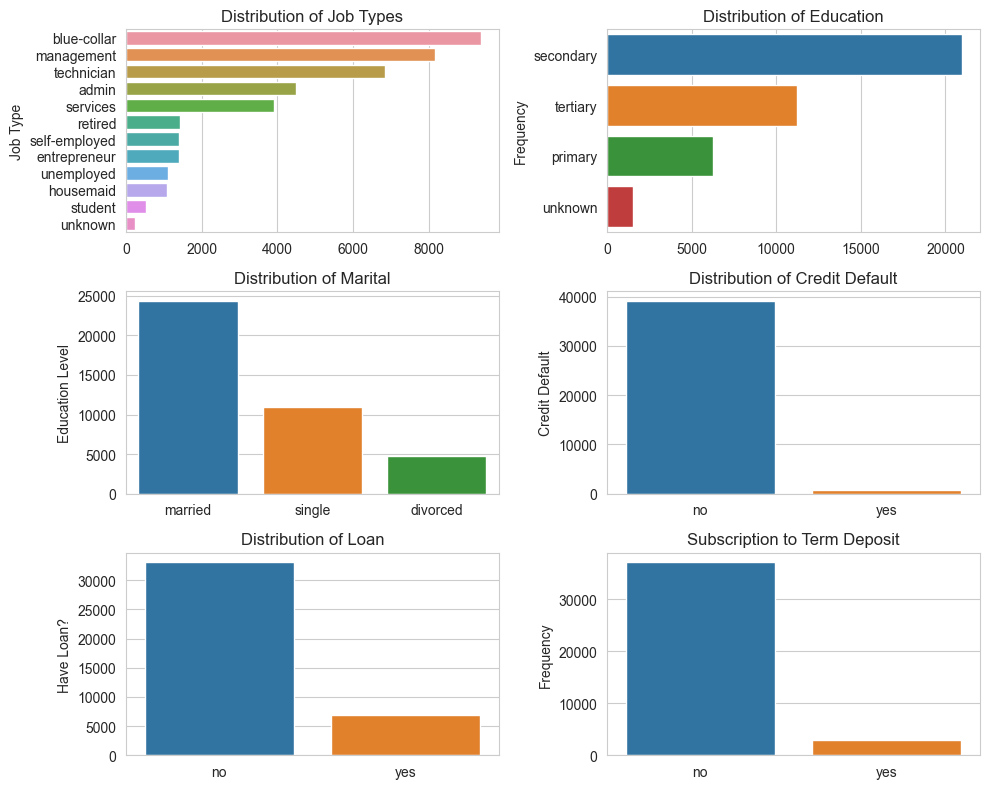

In [8]:
# Plotting distributions of categorical attributes
fig, ax = plt.subplots(3, 2, figsize=(10, 8))

sns.countplot(y=data['job'], order = data['job'].value_counts().index, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Job Types')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('Job Type')

sns.countplot(y=data['education'], order = data['education'].value_counts().index, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Education')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('Frequency')

sns.countplot(x=data['marital'], order = data['marital'].value_counts().index, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Marital')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('Education Level')

sns.countplot(x=data['default'], order = data['default'].value_counts().index, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Credit Default')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('Credit Default')

sns.countplot(x=data['loan'], order = data['loan'].value_counts().index, ax=ax[2, 0])
ax[2, 0].set_title('Distribution of Loan')
ax[2, 0].set_xlabel('')
ax[2, 0].set_ylabel('Have Loan?')

sns.countplot(x=data['y'], order = data['y'].value_counts().index, ax=ax[2, 1])
ax[2, 1].set_title('Subscription to Term Deposit')
ax[2, 1].set_xlabel('')
ax[2, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The visualizations for categorical attributes reveal:

- Job Types: 'Blue-collar', 'management', and 'technician' jobs are the most common among the customers, suggesting these occupations might be key areas to explore for targeted marketing strategies.
- Marital Status: The majority of customers are married.
- Education Levels: A large portion of customers have completed secondary education, with tertiary and primary education also represented.
- Subscription to Term Deposit: The vast majority of customers have not subscribed to a term deposit, indicating the dataset is imbalanced with respect to the target variable. This imbalance needs to be considered in model training and evaluation to ensure accurate prediction performance.

#### Distribution of features within each class

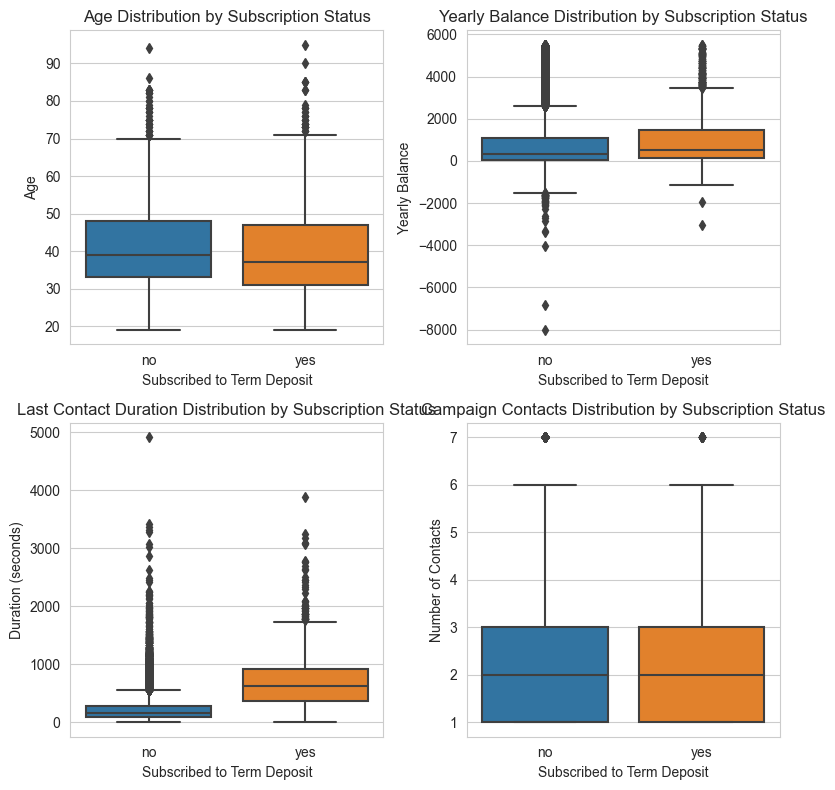

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(8,8))

# Box plot for Age
sns.boxplot(x='y', y='age', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Age Distribution by Subscription Status')
ax[0, 0].set_xlabel('Subscribed to Term Deposit')
ax[0, 0].set_ylabel('Age')

# Box plot for Balance
sns.boxplot(x='y', y='balance', data=data[data['balance'] < data['balance'].quantile(0.95)], ax=ax[0, 1]) # Limit to 95th percentile for better visualization
ax[0, 1].set_title('Yearly Balance Distribution by Subscription Status')
ax[0, 1].set_xlabel('Subscribed to Term Deposit')
ax[0, 1].set_ylabel('Yearly Balance')

# Box plot for Duration
sns.boxplot(x='y', y='duration', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Last Contact Duration Distribution by Subscription Status')
ax[1, 0].set_xlabel('Subscribed to Term Deposit')
ax[1, 0].set_ylabel('Duration (seconds)')

# Box plot for Campaign
sns.boxplot(x='y', y='campaign', data=data[data['campaign'] < data['campaign'].quantile(0.95)], ax=ax[1, 1]) # Limit to 95th percentile for better visualization
ax[1, 1].set_title('Campaign Contacts Distribution by Subscription Status')
ax[1, 1].set_xlabel('Subscribed to Term Deposit')
ax[1, 1].set_ylabel('Number of Contacts')

plt.tight_layout()
plt.show()


The box plots provide insights into how numerical features vary between customers who subscribed to a term deposit and those who did not:

- Age: The age distribution between subscribers and non-subscribers shows some overlap.
- Yearly Balance: Subscribers seem to have a slightly higher median balance compared to non-subscribers, suggesting that financial stability might influence the decision to invest in term deposits.
- Last Contact Duration: There's a noticeable difference in the duration of the last contact between subscribers and non-subscribers. Subscribers tend to have longer last contact durations, which could indicate that successful subscriptions are associated with more in-depth conversations or more effective communication.
- Campaign Contacts: The number of campaign contacts before subscription does not show a drastic difference in the medians between subscribers and non-subscribers.

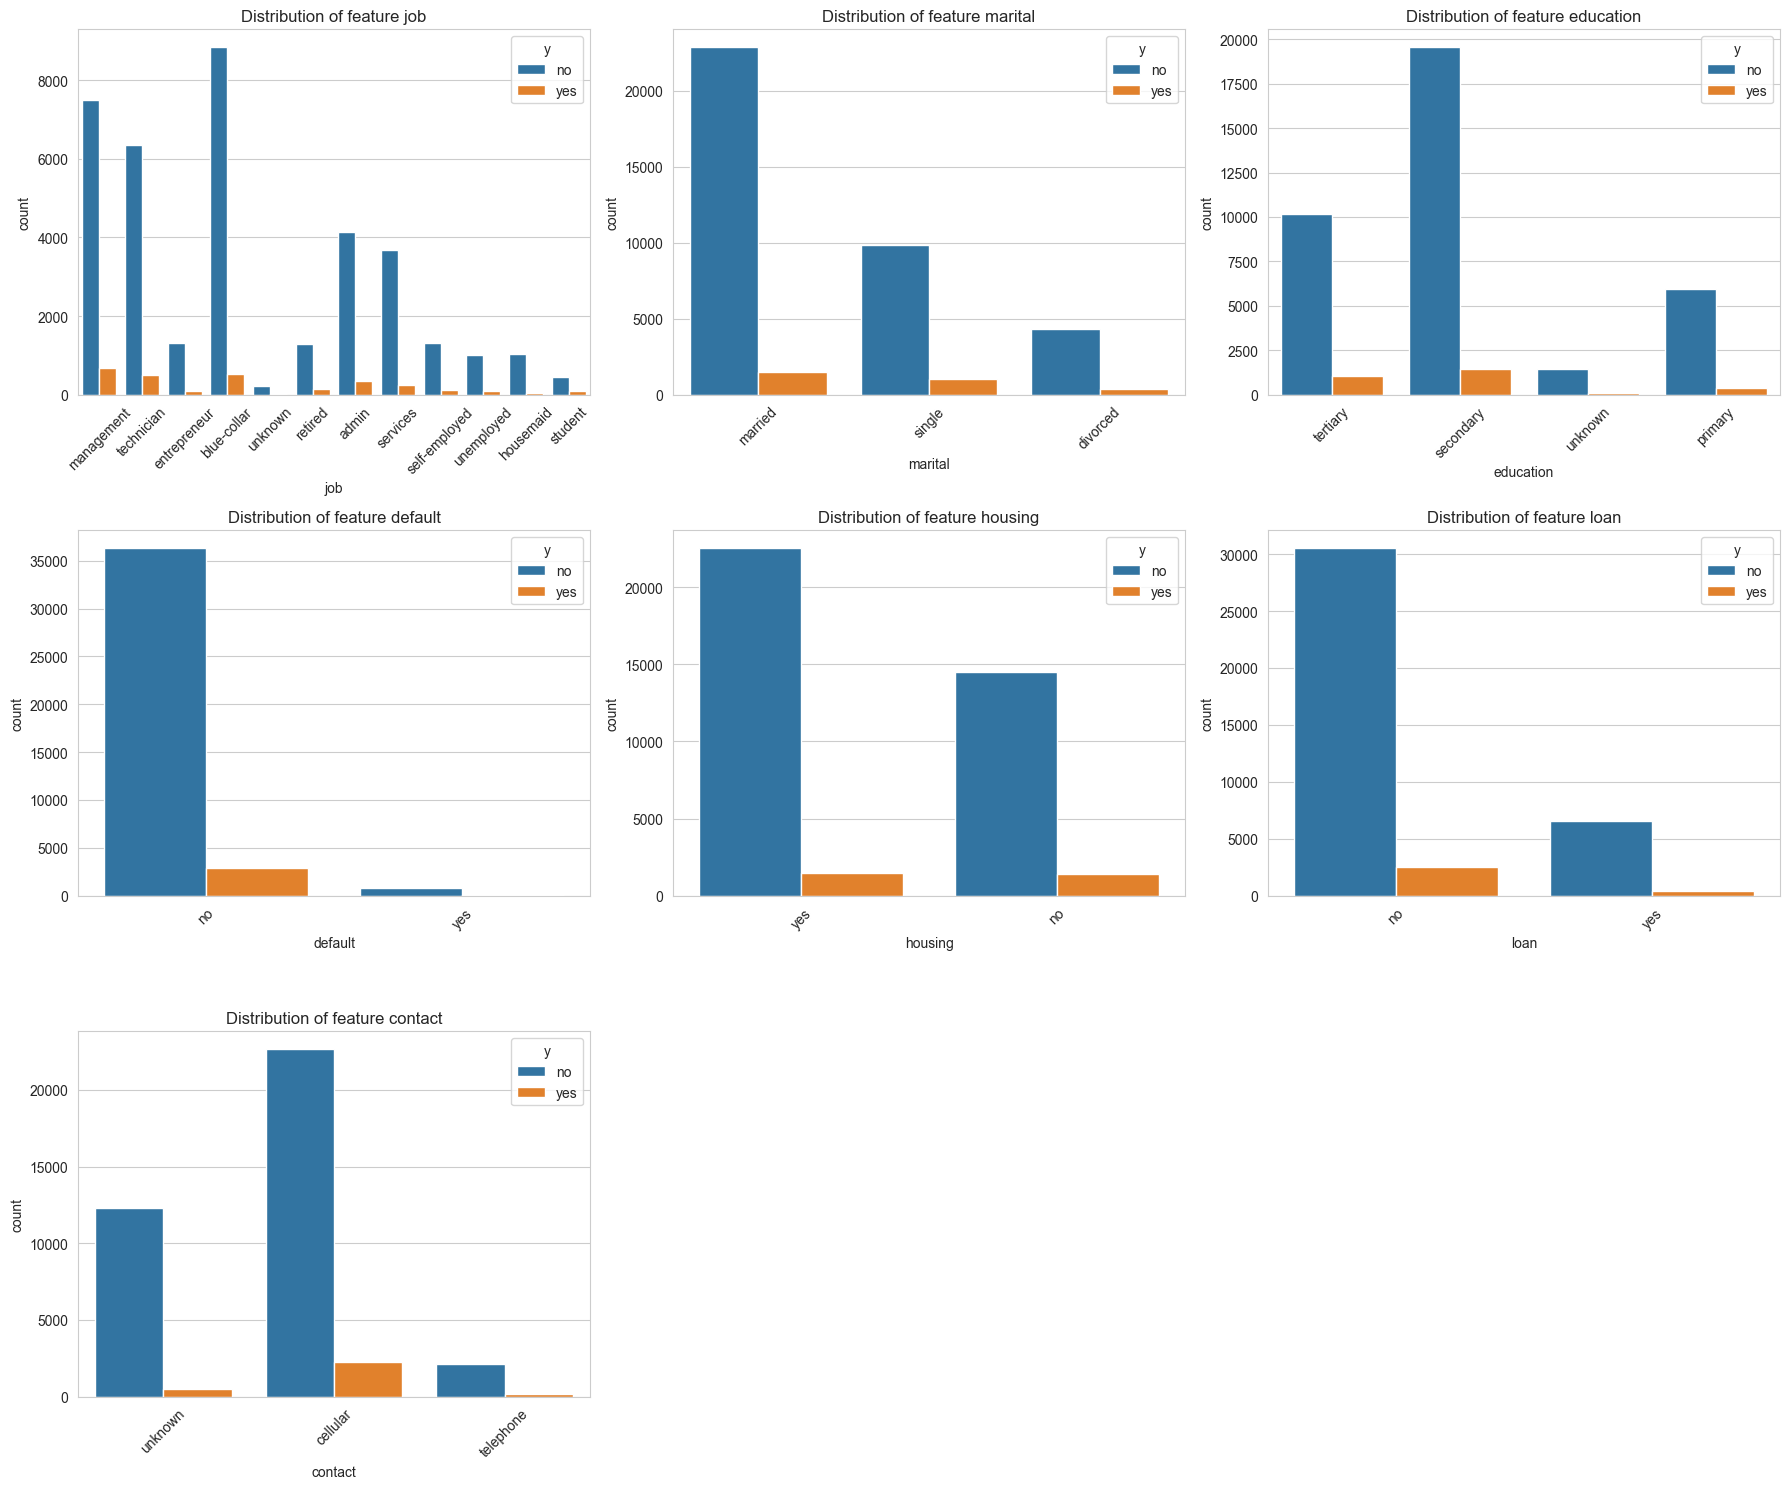

In [10]:
plt.figure(figsize=(18, 15))

# List of categorical columns to plot
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

# Creating subplots for each categorical variable
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='y', data=data)
    plt.title(f'Distribution of feature {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

- Job: Different job categories show varying interest in subscribing to a term deposit, with some jobs like management, technician, and blue-collar being more prevalent in the dataset.
- Marital Status: Married individuals seem to have a higher count in the dataset, but the subscription rate appears to vary across different marital statuses.
- Education: Individuals with secondary and tertiary education levels are more common in the dataset, with variations in subscription rates among different education levels.
- Default: The majority of individuals in the dataset do not have a credit default.
- Housing: A notable number of individuals with housing loans present in both subscriber and non-subscriber categories.
- Loan: Similar to housing, but those without loans has higher subscription rate.
- Contact: The method of contact (cellular, unknown, etc.) also shows differences in how individuals were reached and their subsequent subscription status.

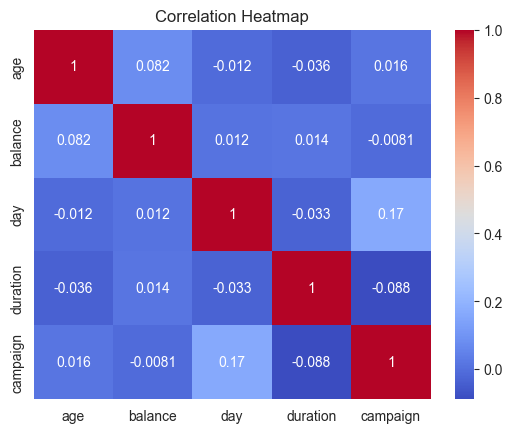

In [11]:
# Calculate correlation matrix including the encoded target variable
corr_matrix = data.corr(numeric_only = True)

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Data Preprocessing

#### Data Encoding 

In [76]:
# Encoding the target variable
data['y'] = data['y'].map({'yes': 1, 'no': 0})

Assuming that month, date and the number of contacts features does not have impact on the target variable, these columns are removed.

In [77]:
data.drop(columns = ['month','day', 'contact'], axis = 1, inplace = True)

All the categorical variables are one-hot encoded here:

In [78]:
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan']
data = pd.get_dummies(data, columns = categorical_vars, drop_first = True)

In [79]:
# Seperate features and target variable
X = data.drop(['y'], axis = 1)
y = data['y']

#### Scaling

Scaling the numerical attributes in the dataset

In [80]:
from sklearn.preprocessing import StandardScaler

numerical_col = ['age','balance','duration','campaign']
scaler = StandardScaler()

X[numerical_col] = scaler.fit_transform(X[numerical_col])

Splitting the data into train and test sets in the ratio 80:20.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

#### Resampling 

The minority class is resampled here such that the size of the minority class is one-third of the majority class.

In [82]:
X_train_upsampled, y_train_upsampled = resample(X_train[y_train == 1],
                                               y_train[y_train == 1],
                                               replace = True,
                                               n_samples = int(sum(y_train == 0)/3),
                                                random_state = 42)

In [83]:
# Combine the upsampled minority class with the original majority class
X_train_upsampled = pd.concat([X_train[y_train == 0], X_train_upsampled])
y_train_upsampled = pd.concat([y_train[y_train == 0], y_train_upsampled])

# Verify the balancing
upsampled_balance = y_train_upsampled.value_counts()
upsampled_balance


0    29683
1     9894
Name: y, dtype: int64

## Machine Learning

### 1. Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with class weight
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state = 56)

# Train the model
logreg.fit(X_train_upsampled, y_train_upsampled)

# Predict on test set
y_pred = logreg.predict(X_test)

In [87]:
minority_class = '1' 
report = classification_report(y_test, y_pred, output_dict=True)

# Extracting accuracy, and f1-score for the minority class
accuracy = report['accuracy']
f1_score = report[minority_class]['f1-score']

print(f"Accuracy of model: {accuracy}")
print(f"Default F1-Score for minority class: {f1_score}")

Accuracy of model: 0.848875
Default F1-Score for minority class: 0.4201438848920863


#### Different Threshholds

Experimenting with different threshold values of class predicted probabilities instead of the default 0.5.

In [88]:
# Predict probabilty of classes in test set
probabilities = logreg.predict_proba(X_test)[:, 1]

# Define a range of thresholds to test
thresholds = np.arange(0.1, 1.0, 0.1)

# Initialize lists to store metrics for each threshold
precisions, recalls, f1_scores, accuracies = [], [], [], []

for threshold in thresholds:
    # Apply threshold
    y_pred = (probabilities >= threshold).astype(int)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = report[minority_class]['precision']
    recall = report[minority_class]['recall']
    f1 = report[minority_class]['f1-score']
    
    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
# Display the metrics at each threshold
for i, threshold in enumerate(thresholds):
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracies[i]:.3f}, Precision: {precisions[i]:.3f}, Recall: {recalls[i]:.3f}, F1-Score: {f1_scores[i]:.3f}")

Threshold: 0.10, Accuracy: 0.276, Precision: 0.090, Recall: 0.991, F1-Score: 0.165
Threshold: 0.20, Accuracy: 0.540, Precision: 0.132, Recall: 0.959, F1-Score: 0.232
Threshold: 0.30, Accuracy: 0.707, Precision: 0.186, Recall: 0.900, F1-Score: 0.308
Threshold: 0.40, Accuracy: 0.798, Precision: 0.238, Recall: 0.819, F1-Score: 0.369
Threshold: 0.50, Accuracy: 0.849, Precision: 0.291, Recall: 0.756, F1-Score: 0.420
Threshold: 0.60, Accuracy: 0.883, Precision: 0.347, Recall: 0.691, F1-Score: 0.462
Threshold: 0.70, Accuracy: 0.906, Precision: 0.402, Recall: 0.613, F1-Score: 0.486
Threshold: 0.80, Accuracy: 0.925, Precision: 0.482, Recall: 0.527, F1-Score: 0.503
Threshold: 0.90, Accuracy: 0.936, Precision: 0.591, Recall: 0.389, F1-Score: 0.469


#### Hyperparameter tuning

In [89]:
param_grid = {

    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2'],  # Type of regularization
    'solver': ['newton-cg', 'lbfgs', 'liblinear'] # Algorithm for optimization
}

lr = LogisticRegression(random_state = 56)
random_search = RandomizedSearchCV(estimator = lr, param_distributions = param_grid,
                                  cv = 5, verbose = 1, scoring = 'accuracy')

random_search.fit(X_train_upsampled, y_train_upsampled)
print("Best parameters:", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01}


In [90]:
# Initialize the Logistic Regression model with class weight adjusted
logreg_tuned = LogisticRegression(**random_search.best_params_, max_iter=1000, class_weight='balanced', random_state=56)

# Train the model
logreg_tuned.fit(X_train_upsampled, y_train_upsampled)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=56, solver='liblinear')

In [91]:
probabilities = logreg_tuned.predict_proba(X_test)[:, 1]

# Define a range of thresholds to test
thresholds = np.arange(0.1, 1.0, 0.1)

# Initialize lists to store metrics for each threshold
precisions, recalls, f1_scores, accuracies = [], [], [], []

for threshold in thresholds:
    # Apply threshold
    y_pred = (probabilities >= threshold).astype(int)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = report[minority_class]['precision']
    recall = report[minority_class]['recall']
    f1 = report[minority_class]['f1-score']
    
    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
# Display the metrics at each threshold
for i, threshold in enumerate(thresholds):
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracies[i]:.3f}, Precision: {precisions[i]:.3f}, Recall: {recalls[i]:.3f}, F1-Score: {f1_scores[i]:.3f}")

Threshold: 0.10, Accuracy: 0.239, Precision: 0.086, Recall: 0.993, F1-Score: 0.159
Threshold: 0.20, Accuracy: 0.514, Precision: 0.126, Recall: 0.965, F1-Score: 0.223
Threshold: 0.30, Accuracy: 0.699, Precision: 0.183, Recall: 0.910, F1-Score: 0.305
Threshold: 0.40, Accuracy: 0.799, Precision: 0.241, Recall: 0.824, F1-Score: 0.372
Threshold: 0.50, Accuracy: 0.852, Precision: 0.294, Recall: 0.750, F1-Score: 0.423
Threshold: 0.60, Accuracy: 0.886, Precision: 0.354, Recall: 0.691, F1-Score: 0.468
Threshold: 0.70, Accuracy: 0.909, Precision: 0.414, Recall: 0.604, F1-Score: 0.491
Threshold: 0.80, Accuracy: 0.927, Precision: 0.498, Recall: 0.511, F1-Score: 0.505
Threshold: 0.90, Accuracy: 0.936, Precision: 0.590, Recall: 0.368, F1-Score: 0.453


##### A threshold of 0.8 for classifying seems to give the best F1-score of 50.5%.

The average accuracy of the tuned Logistic Regression model evaluated with 5-fold cross validation is 84.14% as shown below.

In [94]:
# Initialize the Logistic Regression model with class weight adjusted
logreg_cv = LogisticRegression(**random_search.best_params_, max_iter=1000, class_weight='balanced', random_state = 56)

In [95]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg_cv, X, y, cv=5, scoring='accuracy')

average_score = scores.mean()
print(f"Average Accuracy Score through 5-fold cross validation: {average_score:.2%}")

Average Accuracy Score through 5-fold cross validation: 84.14%


### 2. Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier with 'balanced' class weights
dt_classifier = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train_upsampled, y_train_upsampled)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

report =  classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      7421
           1       0.32      0.31      0.32       579

    accuracy                           0.90      8000
   macro avg       0.64      0.63      0.63      8000
weighted avg       0.90      0.90      0.90      8000



#### Different Thresholds (before tuning)

In [48]:
probabilities = dt_classifier.predict_proba(X_test)[:, 1]

# Define a range of thresholds to test
thresholds = np.arange(0.1, 1.0, 0.1)

# Initialize lists to store metrics for each threshold
precisions, recalls, f1_scores, accuracies = [], [], [], []

for threshold in thresholds:
    # Apply threshold
    y_pred = (probabilities >= threshold).astype(int)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = report[minority_class]['precision']
    recall = report[minority_class]['recall']
    f1 = report[minority_class]['f1-score']
    
    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
# Display the metrics at each threshold
for i, threshold in enumerate(thresholds):
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracies[i]:.3f}, Precision: {precisions[i]:.3f}, Recall: {recalls[i]:.3f}, F1-Score: {f1_scores[i]:.3f}")

Threshold: 0.10, Accuracy: 0.903, Precision: 0.325, Recall: 0.313, F1-Score: 0.319
Threshold: 0.20, Accuracy: 0.903, Precision: 0.325, Recall: 0.313, F1-Score: 0.319
Threshold: 0.30, Accuracy: 0.903, Precision: 0.325, Recall: 0.313, F1-Score: 0.319
Threshold: 0.40, Accuracy: 0.903, Precision: 0.325, Recall: 0.313, F1-Score: 0.319
Threshold: 0.50, Accuracy: 0.903, Precision: 0.325, Recall: 0.313, F1-Score: 0.319
Threshold: 0.60, Accuracy: 0.903, Precision: 0.325, Recall: 0.313, F1-Score: 0.319
Threshold: 0.70, Accuracy: 0.903, Precision: 0.325, Recall: 0.313, F1-Score: 0.319
Threshold: 0.80, Accuracy: 0.903, Precision: 0.325, Recall: 0.313, F1-Score: 0.319
Threshold: 0.90, Accuracy: 0.903, Precision: 0.325, Recall: 0.313, F1-Score: 0.319


The decision tree model seems to be predicting class probablities as either 0 or 1, therefore all threshold return the same metric values. 

#### Hyperparameter Tuning

In [49]:
from scipy.stats import randint

# Define the parameter space
param_dist = {
    'max_depth': [None] + list(range(1, 20)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None] + list(range(1, X_train.shape[1]))
}

# Initialize the classifier
dt = DecisionTreeClassifier(class_weight='balanced')

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train_upsampled, y_train_upsampled)

# Print the best parameters and the best score
print("Best parameters:", random_search.best_params_)

Best parameters: {'max_depth': 19, 'max_features': 22, 'min_samples_leaf': 3, 'min_samples_split': 6}


In [50]:
# Initialize the classifier
dt_tuned = DecisionTreeClassifier(**random_search.best_params_, class_weight='balanced')

# Fit the model to the training data
dt_tuned.fit(X_train_upsampled, y_train_upsampled)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

report =  classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      7421
           1       0.32      0.31      0.32       579

    accuracy                           0.90      8000
   macro avg       0.64      0.63      0.63      8000
weighted avg       0.90      0.90      0.90      8000



In [51]:
probabilities = dt_tuned.predict_proba(X_test)[:, 1]

# Define a range of thresholds to test
thresholds = np.arange(0.1, 1.0, 0.1)

# Initialize lists to store metrics for each threshold
precisions, recalls, f1_scores, accuracies = [], [], [], []

for threshold in thresholds:
    # Apply threshold
    y_pred = (probabilities >= threshold).astype(int)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = report[minority_class]['precision']
    recall = report[minority_class]['recall']
    f1 = report[minority_class]['f1-score']
    
    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
# Display the metrics at each threshold
for i, threshold in enumerate(thresholds):
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracies[i]:.3f}, Precision: {precisions[i]:.3f}, Recall: {recalls[i]:.3f}, F1-Score: {f1_scores[i]:.3f}")

Threshold: 0.10, Accuracy: 0.876, Precision: 0.297, Recall: 0.522, F1-Score: 0.379
Threshold: 0.20, Accuracy: 0.876, Precision: 0.297, Recall: 0.522, F1-Score: 0.379
Threshold: 0.30, Accuracy: 0.876, Precision: 0.297, Recall: 0.522, F1-Score: 0.379
Threshold: 0.40, Accuracy: 0.880, Precision: 0.307, Recall: 0.520, F1-Score: 0.386
Threshold: 0.50, Accuracy: 0.882, Precision: 0.309, Recall: 0.511, F1-Score: 0.385
Threshold: 0.60, Accuracy: 0.882, Precision: 0.308, Recall: 0.506, F1-Score: 0.383
Threshold: 0.70, Accuracy: 0.887, Precision: 0.319, Recall: 0.489, F1-Score: 0.386
Threshold: 0.80, Accuracy: 0.896, Precision: 0.335, Recall: 0.449, F1-Score: 0.384
Threshold: 0.90, Accuracy: 0.908, Precision: 0.368, Recall: 0.371, F1-Score: 0.369


In [98]:
# Initialize the classifier
dt_cv = DecisionTreeClassifier(**random_search.best_params_, class_weight='balanced')

scores = cross_val_score(dt_cv, X, y, cv=5, scoring='accuracy')
print(f"Average Accuracy Score with 5-fold crosss validation: {scores.mean():.2%}")

Average Accuracy Score with 5-fold crosss validation: 85.57%


#### Results after hyperparameter tuning

After tuning, the class probabilities have changed but the F1-score for each threshold is quite low even though accuracy seem to be high.

### 3. XGBoost

In [53]:
import xgboost

In [54]:
scale_pos_weight = sum(y == 0) / sum(y == 1)

# Initialize XGBoost classifier
xgb_clf = xgboost.XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss')

# Fit the model
xgb_clf.fit(X_train_upsampled, y_train_upsampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [55]:
y_pred = xgb_clf.predict(X_test)

report =  classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      7421
           1       0.25      0.77      0.38       579

    accuracy                           0.82      8000
   macro avg       0.62      0.80      0.64      8000
weighted avg       0.93      0.82      0.86      8000



In [56]:
probabilities = xgb_clf.predict_proba(X_test)[:, 1]

# Define a range of thresholds to test
thresholds = np.arange(0.1, 1.0, 0.1)

# Initialize lists to store metrics for each threshold
precisions, recalls, f1_scores, accuracies = [], [], [], []

for threshold in thresholds:
    # Apply threshold
    y_pred = (probabilities >= threshold).astype(int)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = report[minority_class]['precision']
    recall = report[minority_class]['recall']
    f1 = report[minority_class]['f1-score']
    
    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
# Display the metrics at each threshold
for i, threshold in enumerate(thresholds):
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracies[i]:.3f}, Precision: {precisions[i]:.3f}, Recall: {recalls[i]:.3f}, F1-Score: {f1_scores[i]:.3f}")

Threshold: 0.10, Accuracy: 0.644, Precision: 0.160, Recall: 0.919, F1-Score: 0.272
Threshold: 0.20, Accuracy: 0.713, Precision: 0.187, Recall: 0.886, F1-Score: 0.309
Threshold: 0.30, Accuracy: 0.756, Precision: 0.208, Recall: 0.839, F1-Score: 0.333
Threshold: 0.40, Accuracy: 0.791, Precision: 0.230, Recall: 0.803, F1-Score: 0.357
Threshold: 0.50, Accuracy: 0.818, Precision: 0.252, Recall: 0.769, F1-Score: 0.380
Threshold: 0.60, Accuracy: 0.844, Precision: 0.279, Recall: 0.727, F1-Score: 0.403
Threshold: 0.70, Accuracy: 0.865, Precision: 0.302, Recall: 0.660, F1-Score: 0.414
Threshold: 0.80, Accuracy: 0.891, Precision: 0.353, Recall: 0.611, F1-Score: 0.447
Threshold: 0.90, Accuracy: 0.911, Precision: 0.408, Recall: 0.508, F1-Score: 0.452


#### Hyperparameter Tuning

In [65]:
# Define the parameter distribution with explicit lists of values
param_dist = {
    'n_estimators': [50, 75, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.7, 0.75, 0.8, 0.85],
    'colsample_bytree': [0.7, 0.75, 0.8, 0.85,]
}

In [68]:
# Initialize the XGBoost classifier
xgb = xgboost.XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train_upsampled, y_train_upsampled)

# Best parameters and best score
print("Best parameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.7}


In [101]:
xgb_tuned = xgboost.XGBClassifier(**random_search.best_params_, scale_pos_weight=scale_pos_weight, eval_metric='logloss')
xgb_tuned.fit(X_train_upsampled, y_train_upsampled)

probabilities = xgb_tuned.predict_proba(X_test)[:, 1]

In [102]:
# Define a range of thresholds to test
thresholds = np.arange(0.1, 1.0, 0.1)

# Initialize lists to store metrics for each threshold
precisions, recalls, f1_scores, accuracies = [], [], [], []

for threshold in thresholds:
    # Apply threshold
    y_pred = (probabilities >= threshold).astype(int)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = report[minority_class]['precision']
    recall = report[minority_class]['recall']
    f1 = report[minority_class]['f1-score']
    
    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
# Display the metrics at each threshold
for i, threshold in enumerate(thresholds):
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracies[i]:.3f}, Precision: {precisions[i]:.3f}, Recall: {recalls[i]:.3f}, F1-Score: {f1_scores[i]:.3f}")

Threshold: 0.10, Accuracy: 0.575, Precision: 0.139, Recall: 0.941, F1-Score: 0.243
Threshold: 0.20, Accuracy: 0.671, Precision: 0.170, Recall: 0.908, F1-Score: 0.286
Threshold: 0.30, Accuracy: 0.731, Precision: 0.194, Recall: 0.864, F1-Score: 0.317
Threshold: 0.40, Accuracy: 0.774, Precision: 0.220, Recall: 0.836, F1-Score: 0.348
Threshold: 0.50, Accuracy: 0.810, Precision: 0.249, Recall: 0.812, F1-Score: 0.382
Threshold: 0.60, Accuracy: 0.843, Precision: 0.284, Recall: 0.772, F1-Score: 0.415
Threshold: 0.70, Accuracy: 0.867, Precision: 0.319, Recall: 0.734, F1-Score: 0.444
Threshold: 0.80, Accuracy: 0.891, Precision: 0.359, Recall: 0.649, F1-Score: 0.462
Threshold: 0.90, Accuracy: 0.915, Precision: 0.430, Recall: 0.534, F1-Score: 0.476


In [58]:
xgb_tuned = xgboost.XGBClassifier(**random_search.best_params_, scale_pos_weight=scale_pos_weight, eval_metric='logloss')
scores = cross_val_score(xgb_tuned, X, y, cv=5, scoring='accuracy')
print(f"Average Accuracy Score: {scores.mean():.2%}")

Average Accuracy Score: 85.89%


#### Results after hyperparameter tuning

After tuning, the threshold of 0.9 gives a good F1-score of 47.6% and accuracy of 91.5%. 
The average accuracy score of 85.9% is also obtained through 5-fold cross validation

### Results & Discussion 

Among the models experimented here, the Logistic regression model gives the best result in terms of F1-score (50.5%), followed closely by the XGBoost Classifier (47.6%). The accuracy of both models are greater than 81%.

When looking into the most important features for determining the target variable, the features duration, housing, job type etc. seems to be the most influential. Details can be seen below

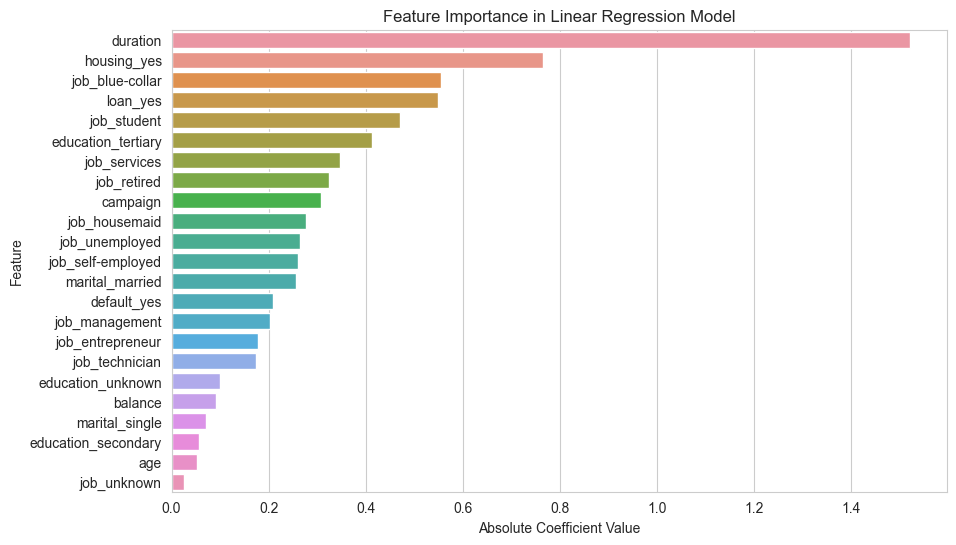

In [107]:
# Extract coefficients of linear regresiion model
coefficients = logreg_tuned.coef_[0]
feature_names = X_train.columns
feature_importance = pd.Series(coefficients, index=feature_names)

# Plot as per the feature importance
sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importance, y=sorted_feature_importance.index)
plt.title('Feature Importance in Linear Regression Model')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()
